In [8]:
import random
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from seaborn.palettes import color_palette
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset

In [9]:
df=pd.read_csv("heart_disease_2015.csv")

In [3]:
df.shape

(253680, 22)

## 2. Preliminary data exploration

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


check the missing value

In [4]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

describe the dataframe

In [5]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
df.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

## 3. EDA

plot the heatmap using the correlation matrix

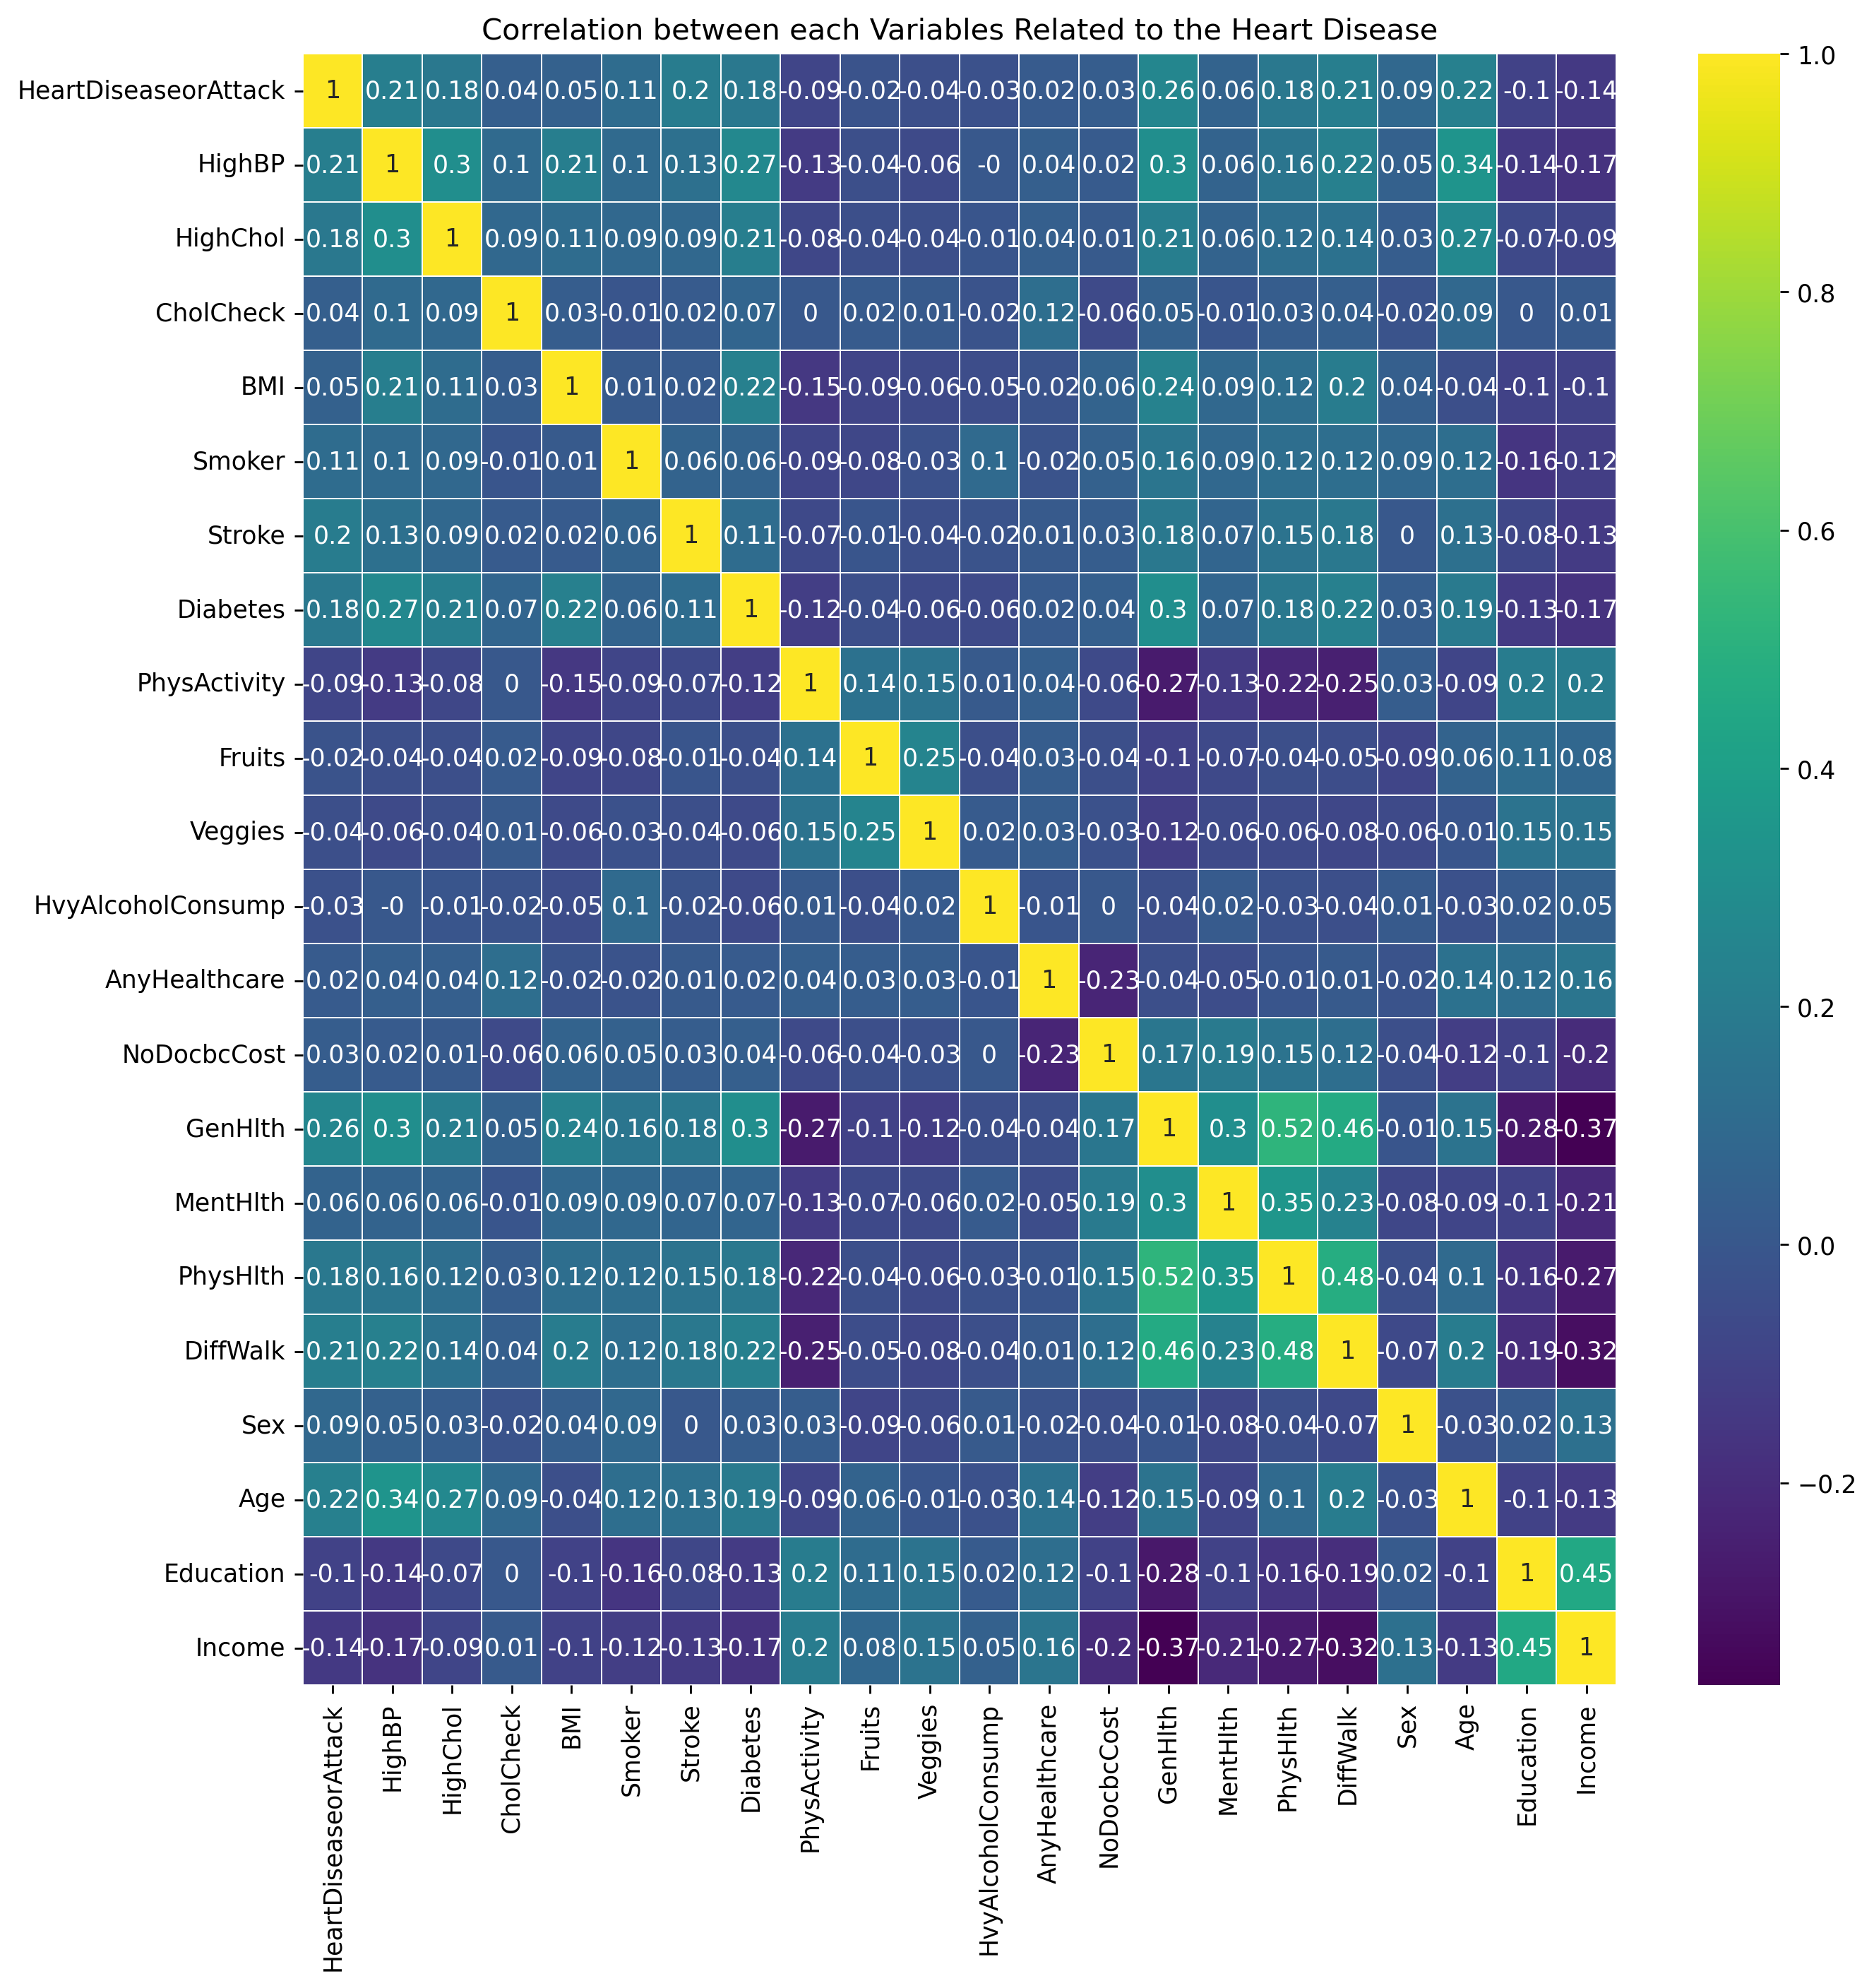

In [25]:
# find the correlation matrix by round in 2 decimal places.
correlation_matrix = df.corr().round(2)

# create the color palette for the heatmap
custom_palette = sns.color_palette("viridis", as_cmap=True)

# set the figure size and dpi
plt.figure(figsize=(12, 12),dpi=250)

# create the heatmap
fig_save=sns.heatmap(correlation_matrix, cmap=custom_palette, linewidths=0.5, annot=True)

# create the title
plt.title('Correlation between each Variables Related to the Heart Disease')

# save the figure
fig_save.figure.savefig("heatmap.png")

The above heatmap presents the relationships among these features. In detail, we can see that the correlation between the target variable and other features are not very strong with many values that are close to 0. Some relatively large correlation values are between features like “GenHlth” (Adults’ general health condition) and “Age”, which are around 0.2. For other features’ correlations, we have the value between “GenHlth” and “PhysHlth” be the highest, which is 0.52. It makes sense since both of them are related to health conditions. 

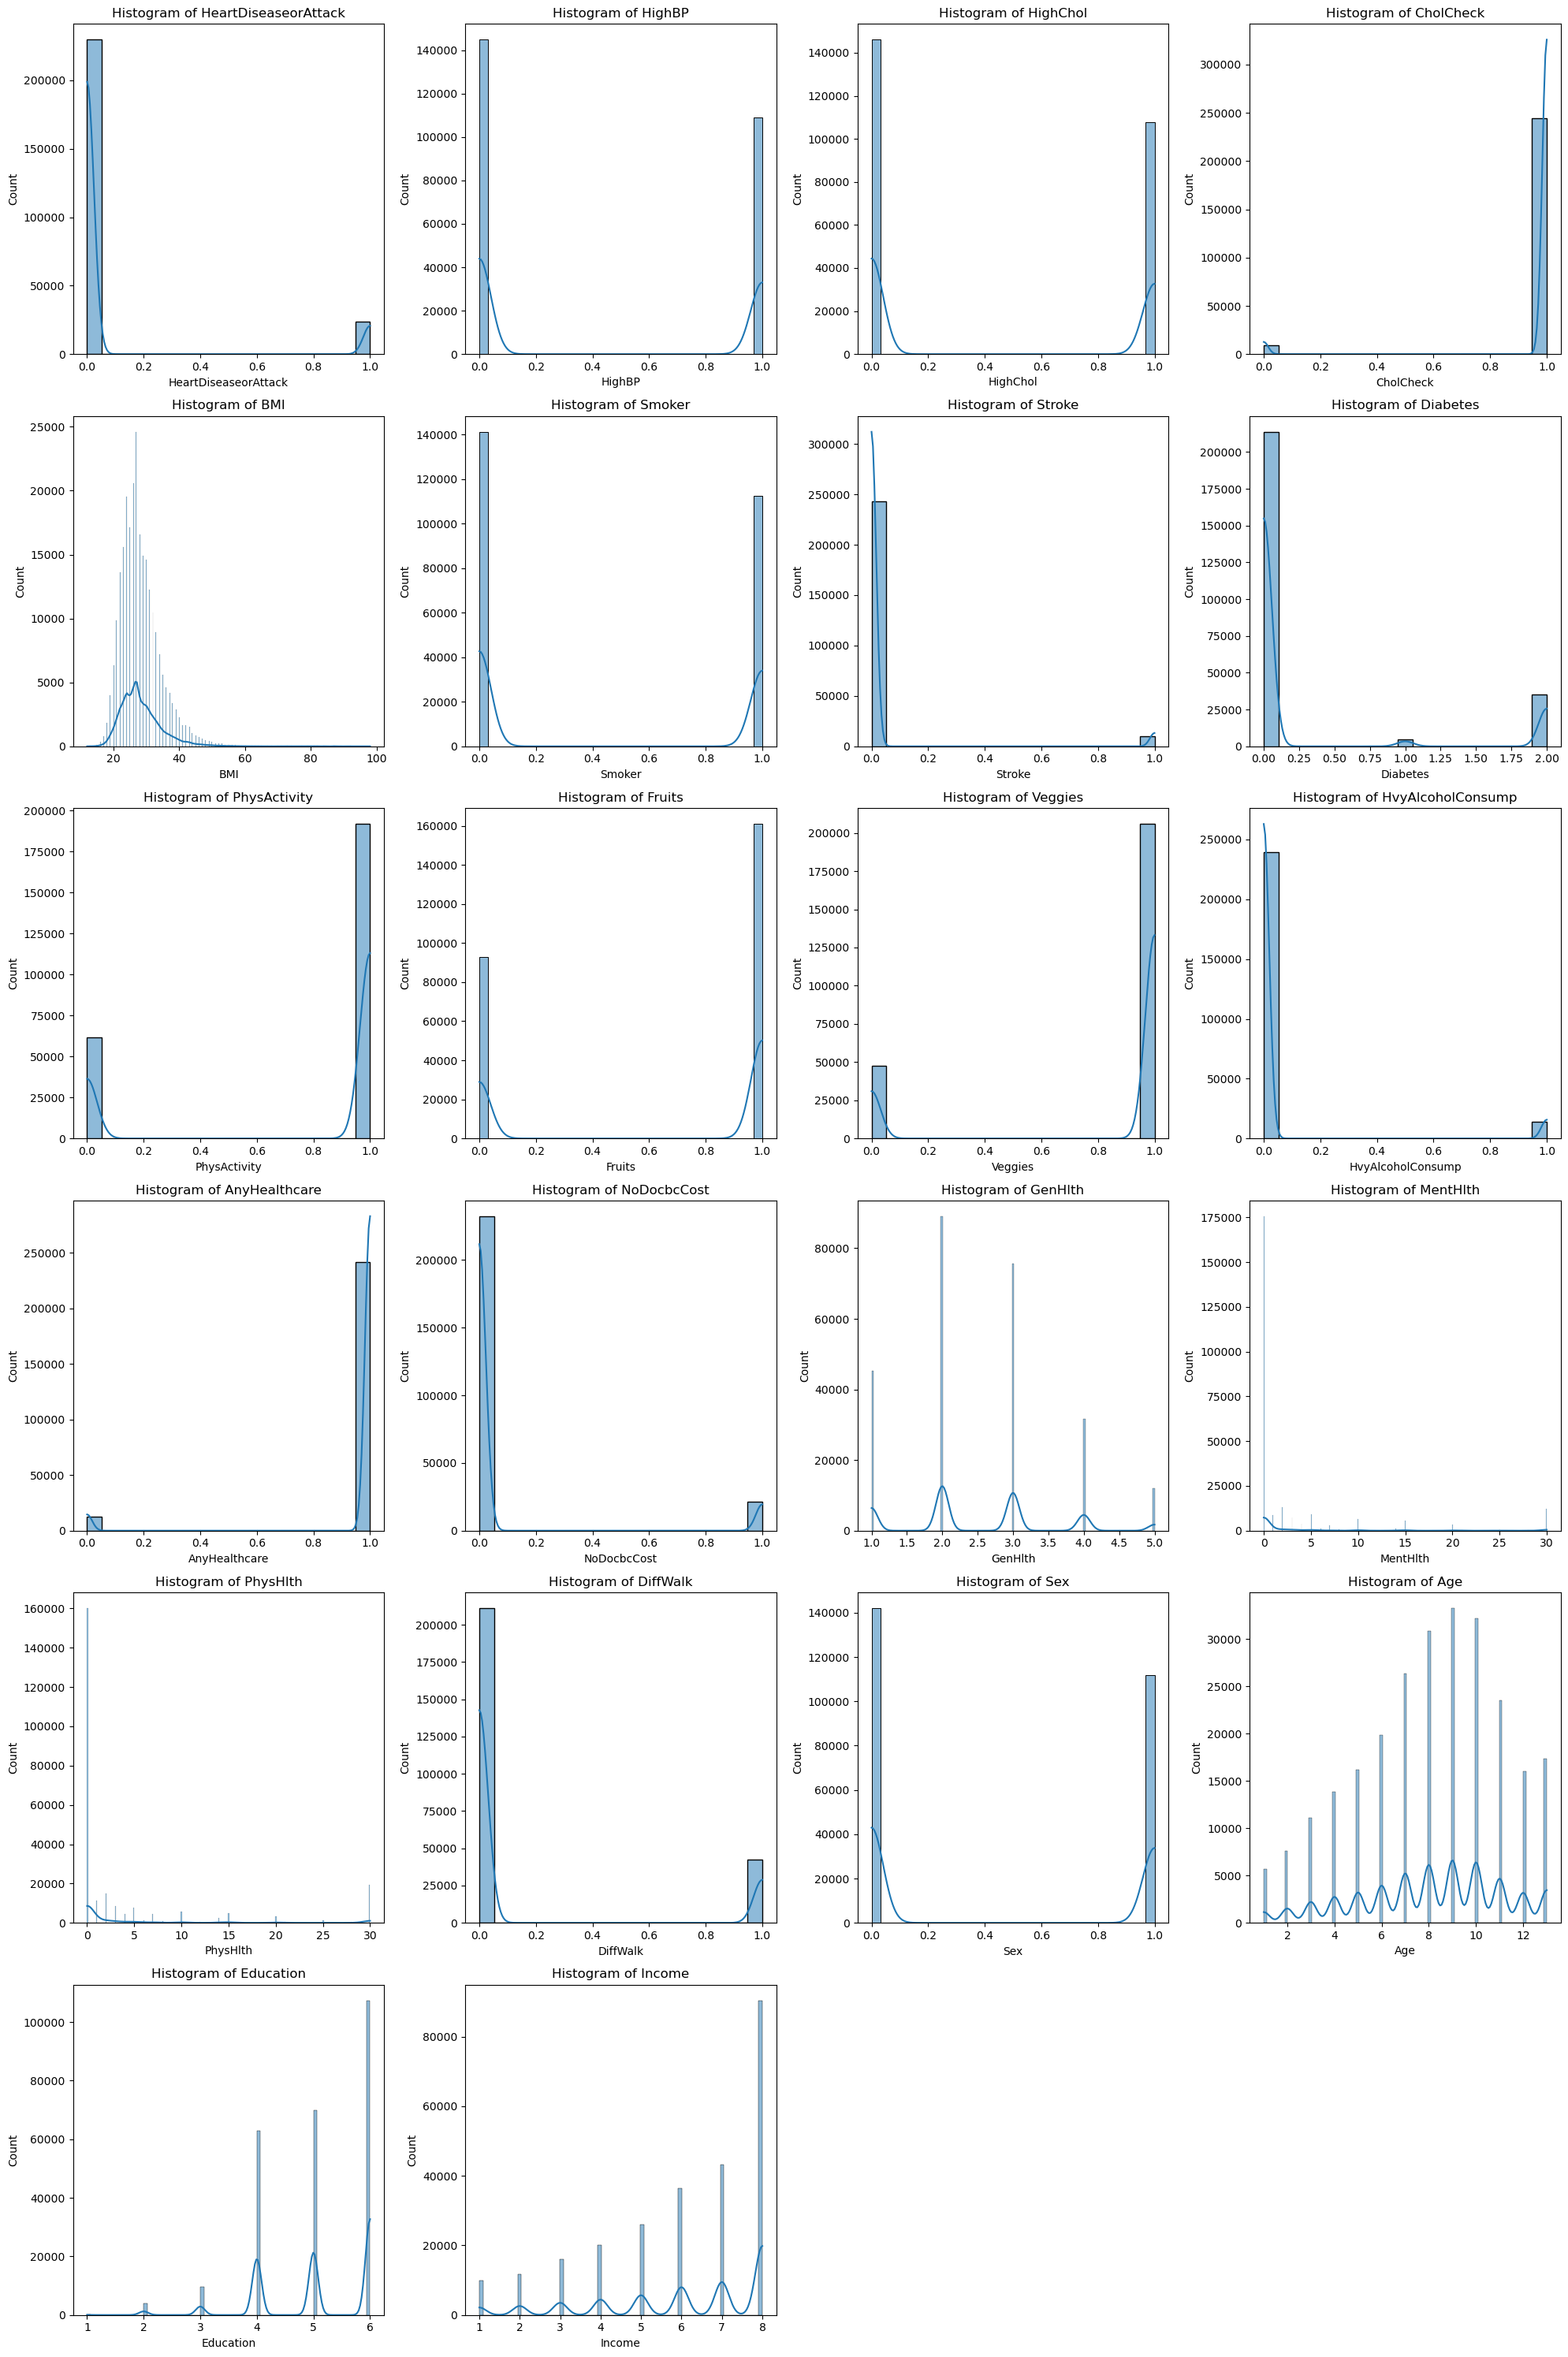

In [10]:
df_col = list(df.columns.values)
num_cols = 4
num_rows = len(df_col) // num_cols + (1 if len(df_col) % num_cols > 0 else 0) 

# Initialize the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D axes array

# Loop through the continuous columns and plot the histograms
for idx, col in enumerate(df_col):
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Histogram of {col}')

# Remove extra subplots (if any)
for idx in range(len(df_col), num_rows * num_cols):
    fig.delaxes(axes[idx])

# Display the plots
plt.tight_layout()
plt.savefig("hist_heart")
plt.show()

These histograms reveal that the majority of features, such as "HighCol" or "ChoiCheck," predominantly exhibit binary values, signifying the presence or absence of specific medical conditions or lifestyle indicators, with 0 indicating "No" and 1 meaning "Yes". Notably, the target variable "HeartDiseaseAttack" displays a significant imbalance, with 229787 respondents indicating the absence of heart disease, while 23893 respondents have reported a history of heart disease. Although such imbalance is intuitive given the low prevalence of heart attacks among the public, it may significantly impact model performance. Moreover, similar imbalances are observed in other features, including "CholCheck", "Strokes", "Diabetes", etc, where one label substantially outweighs the other, might cast influences on classification outcomes.

For variables like “BMI”, we can see that its distribution is skewed to the left away from the normal distribution. Some people have extremely high BMI values compared to the majority of them, leading to such skewness. 


In [10]:
df_use=df.copy()
# change the datatype of the independent variable into object.
df_use["HeartDiseaseorAttack"] = df_use["HeartDiseaseorAttack"].astype('object')

## 4. Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [12]:
x= df_use.loc[:,df.columns != "HeartDiseaseorAttack"]
le = LabelEncoder()
y= le.fit_transform(df_use['HeartDiseaseorAttack'])
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=8649)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_test.shape

(50736, 21)

## 5. Perform Classification

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [10]:
# Get a List of Models as Base Models
def base_models():
  models = dict()
  models['Logistic Regression'] = LogisticRegression()
  models['K-Nearest Neighbors'] = KNeighborsClassifier()
  models['Decision Tree'] = DecisionTreeClassifier()
  # models['Support Vector Classifier'] = SVC()
  models['Gaussian Naive Bayes'] = GaussianNB()
  models['Random Forest'] = RandomForestClassifier()
  models['Bagging Classifier'] = BaggingClassifier()
  models['Gradient Boosting'] = GradientBoostingClassifier()
  models['XGBoost Classifier'] = XGBClassifier()
  return models

In [11]:
# Function to evaluate the list of models by using cross validation
def eval_models(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) # create a 10 fold validation
  scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, 
                            error_score='raise') # get the cross validation score.
  return scores

In [13]:
# get the models to evaluate
models = base_models()

# evaluate the models and store results
results, names = list(), list() 
for name, model in models.items():
  scores = eval_models(model) # get the accuracy score by apply the function defined above
  results.append(scores) # add the scores into the list of result created above
  names.append(name) # add the name of the classifier into the list of name created above
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std())) # print the result

>Logistic Regression 0.908 (0.002)
>K-Nearest Neighbors 0.897 (0.002)
>Decision Tree 0.851 (0.002)
>Gaussian Naive Bayes 0.818 (0.003)
>Random Forest 0.903 (0.002)
>Bagging Classifier 0.895 (0.002)
>Gradient Boosting 0.908 (0.002)
>XGBoost Classifier 0.907 (0.002)


In [14]:
# create a dataframe for boxplot
classmod = pd.DataFrame(np.transpose(results), columns = ["Logistic Regression","K-Nearest Neighbors",'Decision Tree','Gaussian Naive Bayes','Random Forest','Bagging Classifier','Gradient Boosting','XGBoost Classifier'])
classmod = pd.melt(classmod.reset_index(), id_vars='index',value_vars=["Logistic Regression","K-Nearest Neighbors",'Decision Tree','Gaussian Naive Bayes','Random Forest','Bagging Classifier','Gradient Boosting','XGBoost Classifier'])

In [15]:
import plotly.express as px
from plotly.subplots import make_subplots

boxplot for the classifiers

In [17]:
# create a box plot for each classifier.
fig = px.box(classmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "Accuracy"
        },title="Model Performance")
fig.write_image("Boxplot_models.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)
fig.show()

Since the accuracy of using the decision tree and Gaussian Naive Bayes is relatively lower, plot the boxplot by removing those two models.

In [21]:
result_use=results.copy()
result_delete=np.delete(result_use, [2,3], axis=0)
classmod_red = pd.DataFrame(np.transpose(result_delete), columns = ["Logistic Regression","K-Nearest Neighbors",'Random Forest','Bagging Classifier','Gradient Boosting','XGBoost Classifier'])
classmod_red = pd.melt(classmod_red.reset_index(), id_vars='index',value_vars=["Logistic Regression","K-Nearest Neighbors",'Random Forest','Bagging Classifier','Gradient Boosting','XGBoost Classifier'])

In [23]:
fig = px.box(classmod_red, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "Accuracy"
        },title="Model Performance")
fig.write_image("Boxplot_models_reduce.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)
fig.show()

## 6. Stack Model

In [24]:
from sklearn.ensemble import StackingClassifier

Since Logistic Regression, Random Forest, Gradient boosting, and XGBoost Classifier have accuracy more than 0.9, using these model to build the stack classifier.

In [32]:
# get a stacking ensemble of models
def get_stacking():
  # create a list for the first level (base level) classifier.
  level0 = list()
  level0.append(('Random Forest', RandomForestClassifier()))
  level0.append(('Gradient Boosting', GradientBoostingClassifier()))
  level0.append(('XGBoost Classifier', XGBClassifier()))
  # set the logistic regression as a second level classifier. 
  level1 = LogisticRegression()
  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

In [33]:
# Get a List of Models as Base Models including Stack Model
def base_models_2():
  models = dict()
  models["Logistic Regression"] = LogisticRegression()
  models["Random Forest"] = RandomForestClassifier()
  models['Gradient Boosting'] = GradientBoostingClassifier()
  models['XGBoost Classifier'] = XGBClassifier()
  models["Stacked Model"] = get_stacking()
  return models

In [28]:
# Function to evaluate the list of models by using cross validation
def eval_models(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) # create a 10 fold validation
  scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, 
                            error_score='raise') # get the cross validation score.
  return scores

In [34]:
# get the models to evaluate
models_2 = base_models_2()

# evaluate the models and store results
results_2, names_2 = list(), list() 
for name_2, model_2 in models_2.items():
  scores_2 = eval_models(model_2) # get the accuracy score by apply the function defined above
  results_2.append(scores_2) # add the scores into the list of result created above
  names_2.append(name_2) # add the name of the classifier into the list of name created above
  print('>%s %.3f' % (name_2, scores_2.mean())) # print the result

>Logistic Regression 0.908
>Random Forest 0.903
>Gradient Boosting 0.908
>XGBoost Classifier 0.907
>Stacked Model 0.907


In [35]:
classmod_2 = pd.DataFrame(np.transpose(results_2), columns = ["Logistic Regression","Random Forest",'Gradient Boosting','XGBoost Classifier',"Stacked Model"])
classmod_2 = pd.melt(classmod_2.reset_index(), id_vars='index',value_vars=["Logistic Regression","Random Forest",'Gradient Boosting','XGBoost Classifier',"Stacked Model"])

In [37]:
# create a box plot for each classifier.
fig = px.box(classmod_2, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "Accuracy"
        },title="Model Performance")
fig.write_image("Boxplot_models_stack.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)
fig.show()

### Export the Pickle model and import it back. Use the imported model to predict the y_test from x_test and report the confusion metrix.

In [39]:
import pickle

# create first level (base) classifier
level0 = list()
level0.append(('Random Forest', RandomForestClassifier()))
level0.append(('Gradient Boosting', GradientBoostingClassifier()))
level0.append(('XGBoost Classifier', XGBClassifier()))

# create second level classifier
level1 = LogisticRegression()

# apply the stacked classifier based on the first and second level of classifier.
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Random Forest', RandomForestClassifier()),
                               ('Gradient Boosting',
                                GradientBoostingClassifier()),
                               ('XGBoost Classifier',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression())

In [40]:
# export the model in a pickle file.
pkl_filename = "ProjectPickle.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [41]:
# import the model in the pickle file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [42]:
# check the accuracy of the test set.
score = pickle_model.score(X_test, y_test)
print("Test accuracy score: {0:.2f} %".format(100 * score))
Y_predict = pickle_model.predict(X_test)

Test accuracy score: 90.71 %


In [43]:
from sklearn.metrics import classification_report

# create a dataframe to store the value for both actual values and predictions.
predictions = pd.DataFrame(Y_predict, columns=['predictions'])
predictions['actual'] = y_test

# show the classification report
print(classification_report(predictions['actual'], predictions['predictions']))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     45981
           1       0.51      0.16      0.24      4755

    accuracy                           0.91     50736
   macro avg       0.72      0.57      0.60     50736
weighted avg       0.88      0.91      0.88     50736



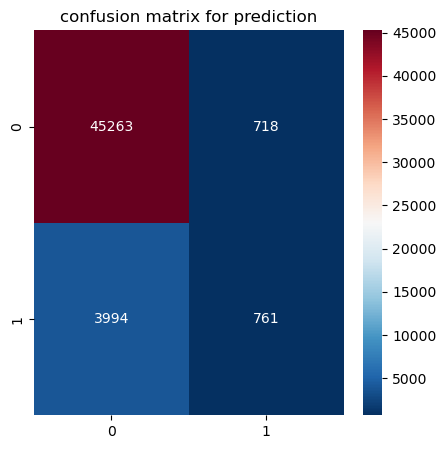

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# show the confusion matrix by using the heatmap
cm = confusion_matrix(y_test, Y_predict)
plt.figure(figsize=(5,5),dpi=100)
fig_conf=sns.heatmap(cm, annot=True, fmt='d', cmap='RdBu_r')

# create the title
plt.title('confusion matrix for prediction')

# save the figure
fig_conf.figure.savefig("confusion_matrix.png")
plt.show()

The accuracy of this model on the test dataset is 0.91, which is acceptable. However, according to the confusion matrix above, we can observe that this model struggles with those positive patients, and the recall score is not ideal. The performance of this stacked model can be further improved by hyperparameter tuning.

## 7. Hyperparameter Tuning

In [14]:
# Define the classifiers and parameter space
classifiers = [
    ('Logistic Regression',LogisticRegression(),{
        # 'penalty': ['l1', 'l2'],
        'C': [0.1,0.5,1,3],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 200, 500]
    }),
    ('RandomForest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 20, 40],
    }),
    ('GradientBoosting', GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1, 0.2, 0.5],
        'max_depth': [2, 3, 5, 8]
    }),
    ('XGBoost', XGBClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [4, 6, 8],
    }),
]

In [15]:
for name, clf, param_dist in classifiers:
    print(name)
    print('------------')
    print(clf)
    print('----------------')
    print(param_dist)

Logistic Regression
------------
LogisticRegression()
----------------
{'C': [0.1, 0.5, 1, 3], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 200, 500]}
RandomForest
------------
RandomForestClassifier()
----------------
{'n_estimators': [50, 100, 200], 'max_depth': [None, 20, 40]}
GradientBoosting
------------
GradientBoostingClassifier()
----------------
{'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2, 0.5], 'max_depth': [2, 3, 5, 8]}
XGBoost
------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
   

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier

In [16]:
# Store the best models and their accuracy scores
best_models = {}
best_accuracies = []

# Perform GridSearchCV for each classifier
for name, clf, param_dist in classifiers:
    # random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=9, cv=5, n_jobs=-1)
    random_search =GridSearchCV(clf, param_grid=param_dist, cv=9, n_jobs=-1, verbose=2)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    best_models[name] = best_model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    best_accuracies.append((name, accuracy))

Fitting 9 folds for each of 60 candidates, totalling 540 fits
Fitting 9 folds for each of 9 candidates, totalling 81 fits
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 27 candidates, totalling 243 fits


In [18]:
best_models

{'Logistic Regression': LogisticRegression(C=0.1, max_iter=200, solver='saga'),
 'RandomForest': RandomForestClassifier(max_depth=20, n_estimators=200),
 'GradientBoosting': GradientBoostingClassifier(max_depth=2, n_estimators=50),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=4, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=200, n_jobs=None,
               num_parallel_tree=None, random_state=Non

In [25]:
# Get a List of Models as Base Models including Stack Model
def base_models_2():
  models = dict()
  models["Logistic Regression"] = LogisticRegression(C=0.1, max_iter=200, solver='saga')
  models["Random Forest"] = RandomForestClassifier(max_depth=20, n_estimators=200)
  models['Gradient Boosting'] = GradientBoostingClassifier(max_depth=2, n_estimators=50)
  models['XGBoost Classifier'] = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4)
  models["Stacked Model"] = get_stacking()
  return models

In [26]:
# get a stacking ensemble of models
def get_stacking():
  # create a list for the first level (base level) classifier.
  level0 = list()
  level0.append(('Random Forest', RandomForestClassifier(max_depth=20, n_estimators=200)))
  level0.append(('Gradient Boosting', GradientBoostingClassifier(max_depth=2, n_estimators=50)))
  level0.append(('XGBoost Classifier', XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4)))
  # set the logistic regression as a second level classifier. 
  level1 = LogisticRegression(C=0.1, max_iter=200, solver='saga')
  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

In [23]:
# Function to evaluate the list of models by using cross validation
def eval_models(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) # create a 10 fold validation
  scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, 
                            error_score='raise') # get the cross validation score.
  return scores

In [29]:
# get the models to evaluate
models_2 = base_models_2()

# evaluate the models and store results
results_2, names_2 = list(), list() 
for name_2, model_2 in models_2.items():
  scores_2 = eval_models(model_2) # get the accuracy score by apply the function defined above
  results_2.append(scores_2) # add the scores into the list of result created above
  names_2.append(name_2) # add the name of the classifier into the list of name created above
  print('>%s %.3f' % (name_2, scores_2.mean())) # print the result

>Logistic Regression 0.908
>Random Forest 0.907
>Gradient Boosting 0.908
>XGBoost Classifier 0.908
>Stacked Model 0.907


In [30]:
classmod_2 = pd.DataFrame(np.transpose(results_2), columns = ["Logistic Regression","Random Forest",'Gradient Boosting','XGBoost Classifier',"Stacked Model"])
classmod_2 = pd.melt(classmod_2.reset_index(), id_vars='index',value_vars=["Logistic Regression","Random Forest",'Gradient Boosting','XGBoost Classifier',"Stacked Model"])

In [32]:
import plotly.express as px
from plotly.subplots import make_subplots

In [33]:
# create a box plot for each classifier.
fig = px.box(classmod_2, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "Accuracy"
        },title="Model Performance")
fig.write_image("Boxplot_models_stack.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)
fig.show()

save as pickle file

In [34]:
import pickle

# create first level (base) classifier
level0 = list()
level0.append(('Random Forest', RandomForestClassifier(max_depth=20, n_estimators=200)))
level0.append(('Gradient Boosting', GradientBoostingClassifier(max_depth=2, n_estimators=50)))
level0.append(('XGBoost Classifier', XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4)))

# create second level classifier
level1 = LogisticRegression(C=0.1, max_iter=200, solver='saga')

# apply the stacked classifier based on the first and second level of classifier.
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=20,
                                                       n_estimators=200)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(max_depth=2,
                                                           n_estimators=50)),
                               ('XGBoost Classifier',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_st...
                                              learning_rate=0.05, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=4,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression(C=0.1, max_iter=200,
                                                      solver='saga'))

In [35]:
# export the model in a pickle file.
pkl_filename = "hyperparametertuningPickle.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [21]:
import pickle

In [3]:
# import the model in the pickle file
with open("hyperparametertuningPickle.pkl", 'rb') as file:
    pickle_model = pickle.load(file)

In [10]:
# check the accuracy of the test set.
score = pickle_model.score(X_test, y_test)
print("Test accuracy score: {0:.2f} %".format(100 * score))
Y_predict = pickle_model.predict(X_test)

Test accuracy score: 90.77 %


small sample pickle file

In [24]:
df_small=df_use.sample(n=1000, random_state=8649)

In [25]:
x_small= df_small.loc[:,df.columns != "HeartDiseaseorAttack"]
le = LabelEncoder()
y_small= le.fit_transform(df_small['HeartDiseaseorAttack'])
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(x_small,y_small, test_size=0.2, random_state=8649)
scaler = StandardScaler()
X_train_small = scaler.fit_transform(X_train_small)
X_test_small = scaler.transform(X_test_small)

In [26]:
# create first level (base) classifier
level0 = list()
level0.append(('Random Forest', RandomForestClassifier(max_depth=20, n_estimators=200)))
level0.append(('Gradient Boosting', GradientBoostingClassifier(max_depth=2, n_estimators=50)))
level0.append(('XGBoost Classifier', XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4)))

# create second level classifier
level1 = LogisticRegression(C=0.1, max_iter=200, solver='saga')

# apply the stacked classifier based on the first and second level of classifier.
model_small = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model_small.fit(X_train_small, y_train_small)

StackingClassifier(cv=5,
                   estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=20,
                                                       n_estimators=200)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(max_depth=2,
                                                           n_estimators=50)),
                               ('XGBoost Classifier',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_st...
                                              learning_rate=0.05, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=4,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression(C=0.1, max_iter=200,
                                                      solver='saga'))

In [27]:
# export the model in a pickle file.
pkl_filename = "samplehptuning.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_small, file)

In [28]:
# import the model in the pickle file
with open("samplehptuning.pkl", 'rb') as file:
    pickle_model = pickle.load(file)

In [29]:
# check the accuracy of the test set.
score = pickle_model.score(X_test, y_test)
print("Test accuracy score: {0:.2f} %".format(100 * score))
Y_predict = pickle_model.predict(X_test)

Test accuracy score: 90.63 %
